In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/data/employee_cleaned.csv")

In [10]:
X = df.drop(columns=['Attrition'])

In [11]:
non_numeric_cols = X.select_dtypes(include='object').columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['EducationLevel'], dtype='object')


In [12]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [14]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

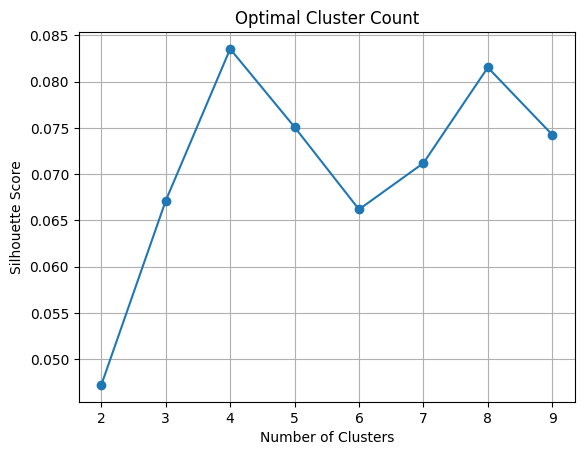

In [15]:
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Cluster Count')
plt.grid(True)
plt.show()


In [16]:
best_k = K[np.argmax(silhouette_scores)]
print("Best number of clusters:", best_k)

Best number of clusters: 4


In [17]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

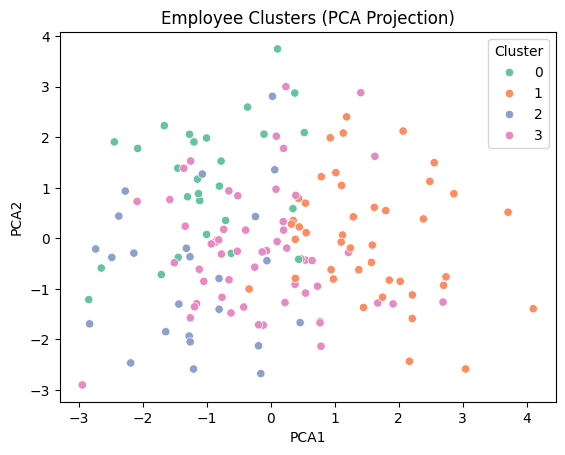

In [19]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Employee Clusters (PCA Projection)')
plt.show()